In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import textwrap

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
BU_FOLDER2 = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_16042023")

In [40]:
synthetic_classification_results = pd.read_csv(os.path.join(BU_FOLDER2, "results", "synthetic_classification_results.csv"))
original_classification_results = pd.read_csv(os.path.join(BU_FOLDER2, "results", "original_classification_results.csv"))

In [51]:
adult_small_data = synthetic_classification_results[synthetic_classification_results['dataset_name'] == 'adult_small']
adult_small_data_original = original_classification_results[original_classification_results['dataset_name'] == 'adult_small']

In [52]:
adult_small_data

,experiment_id,dataset_name,dataset_index,query,epsilon,MCMC_algorithm,model_name,accuracy,balanced_accuracy,F1
0,JBCU751K,adult_small,0.0,[],0.1,NUTS,DummyClassifier,0.754316,0.500000,0.000000
1,JBCU751K,adult_small,0.0,[],0.1,NUTS,GradientBoostingClassifier,0.780611,0.694204,0.540089
2,JBCU751K,adult_small,0.0,[],0.1,NUTS,LGBMClassifier,0.769987,0.689349,0.531385
3,JBCU751K,adult_small,0.0,[],0.1,NUTS,XGBClassifier,0.765073,0.681171,0.519163
4,JBCU751K,adult_small,0.0,[],0.1,NUTS,RandomForestClassifier,0.761155,0.660624,0.487826
...,...,...,...,...,...,...,...,...,...,...
28240,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,LGBMClassifier,0.811620,0.716673,0.580263
28241,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,XGBClassifier,0.811753,0.716669,0.580311
28242,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,RandomForestClassifier,0.811753,0.716761,0.580435
28243,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,LinearSVC,0.816401,0.715285,0.580234


In [57]:
adult_small_data_original

,dataset_name,model_name,accuracy,balanced_accuracy,F1
0,adult_small,DummyClassifier,0.754316,0.500000,0.000000
1,adult_small,GradientBoostingClassifier,0.821580,0.724641,0.595270
2,adult_small,LGBMClassifier,0.821846,0.729647,0.601988
3,adult_small,XGBClassifier,0.819522,0.731296,0.602980
4,adult_small,RandomForestClassifier,0.816202,0.726908,0.595794
5,adult_small,LinearSVC,0.821912,0.699894,0.559316
6,adult_small,MLPClassifier,0.819323,0.735993,0.608771


In [58]:
best_accuracy = adult_small_data_original['accuracy'].max().item()
print(best_accuracy)
best_balanced_accuracy = adult_small_data_original['balanced_accuracy'].max().item()
print(best_balanced_accuracy)
best_F1 = adult_small_data_original['F1'].max().item()
print(best_F1)

0.8219123505976096
0.7359930529120671
0.6087706685837527


In [48]:
adult_small_data = pd.concat([adult_small_data, adult_small_data_original])

In [49]:
adult_small_data

,experiment_id,dataset_name,dataset_index,query,epsilon,MCMC_algorithm,model_name,accuracy,balanced_accuracy,F1
0,JBCU751K,adult_small,0.0,[],0.1,NUTS,DummyClassifier,0.754316,0.500000,0.000000
1,JBCU751K,adult_small,0.0,[],0.1,NUTS,GradientBoostingClassifier,0.780611,0.694204,0.540089
2,JBCU751K,adult_small,0.0,[],0.1,NUTS,LGBMClassifier,0.769987,0.689349,0.531385
3,JBCU751K,adult_small,0.0,[],0.1,NUTS,XGBClassifier,0.765073,0.681171,0.519163
4,JBCU751K,adult_small,0.0,[],0.1,NUTS,RandomForestClassifier,0.761155,0.660624,0.487826
...,...,...,...,...,...,...,...,...,...,...
2,NaN,adult_small,NaN,[],∞,NaN,LGBMClassifier,0.821846,0.729647,0.601988
3,NaN,adult_small,NaN,[],∞,NaN,XGBClassifier,0.819522,0.731296,0.602980
4,NaN,adult_small,NaN,[],∞,NaN,RandomForestClassifier,0.816202,0.726908,0.595794
5,NaN,adult_small,NaN,[],∞,NaN,LinearSVC,0.821912,0.699894,0.559316


In [15]:
adult_small_data_summary = adult_small_data.groupby(by=['model_name', 'epsilon', 'query'], as_index=False, sort=False).agg(
    accuracy_mean = pd.NamedAgg(column='accuracy', aggfunc=pd.Series.mean),
    accuracy_std = pd.NamedAgg(column='accuracy', aggfunc=pd.Series.std),
    balanced_accuracy_mean = pd.NamedAgg(column='balanced_accuracy', aggfunc=pd.Series.mean),
    balanced_accuracy_std = pd.NamedAgg(column='balanced_accuracy', aggfunc=pd.Series.std),
    F1_mean = pd.NamedAgg(column='F1', aggfunc=pd.Series.mean),
    F1_std = pd.NamedAgg(column='F1', aggfunc=pd.Series.std),
)

In [37]:
adult_small_data_summary

,model_name,epsilon,query,accuracy_mean,accuracy_std,balanced_accuracy_mean,balanced_accuracy_std,F1_mean,F1_std
0,DummyClassifier,0.1,[],0.754316,4.463041e-16,0.500000,0.000000,0.000000,0.000000
1,GradientBoostingClassifier,0.1,[],0.794066,1.205364e-02,0.692052,0.021939,0.538202,0.036132
2,LGBMClassifier,0.1,[],0.792566,1.231528e-02,0.695180,0.018776,0.543334,0.030134
3,XGBClassifier,0.1,[],0.790741,1.244846e-02,0.694559,0.017533,0.542210,0.028001
4,RandomForestClassifier,0.1,[],0.790301,1.244941e-02,0.692181,0.017322,0.538694,0.027760
...,...,...,...,...,...,...,...,...,...
275,LGBMClassifier,8.0,"[['age', 'sex']]",0.810409,3.503427e-03,0.721864,0.007408,0.586441,0.008629
276,XGBClassifier,8.0,"[['age', 'sex']]",0.809217,3.198102e-03,0.721436,0.007749,0.585394,0.009487
277,RandomForestClassifier,8.0,"[['age', 'sex']]",0.807800,3.225815e-03,0.718845,0.007601,0.581440,0.009702
278,LinearSVC,8.0,"[['age', 'sex']]",0.814847,2.547399e-03,0.716767,0.003816,0.581584,0.004413


/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

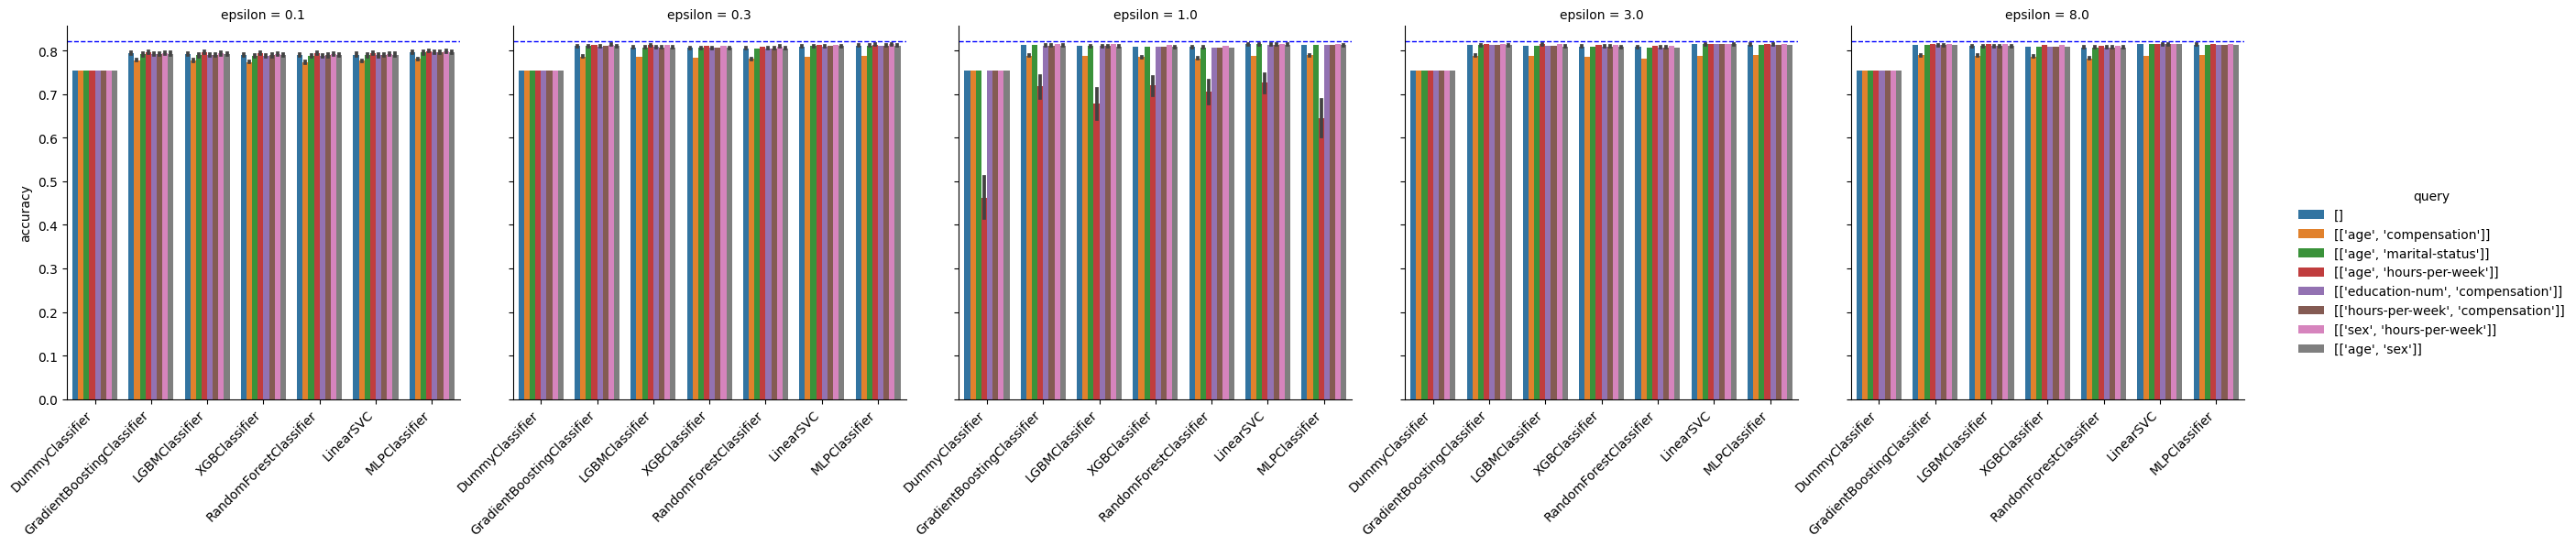

In [64]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="accuracy", hue="query", col="epsilon")
g.refline(y = best_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=45, ha="right")
g.set(xlabel=None)
plt.show()

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

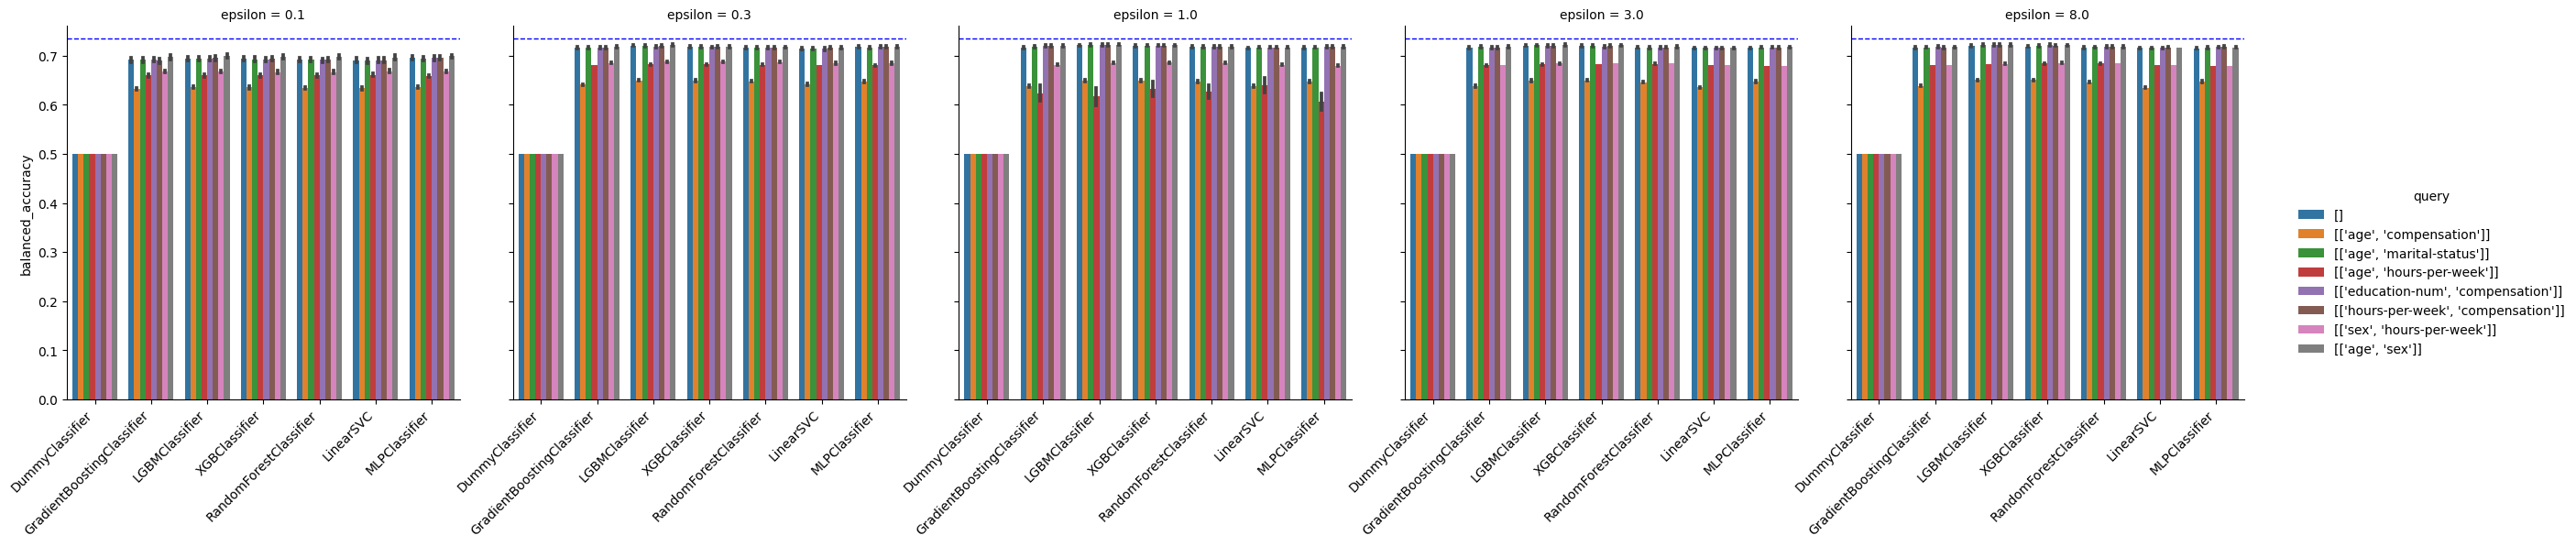

In [67]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="balanced_accuracy", hue="query", col="epsilon")
g.refline(y=best_balanced_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=45, ha="right")
g.set(xlabel=None)
plt.show()

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

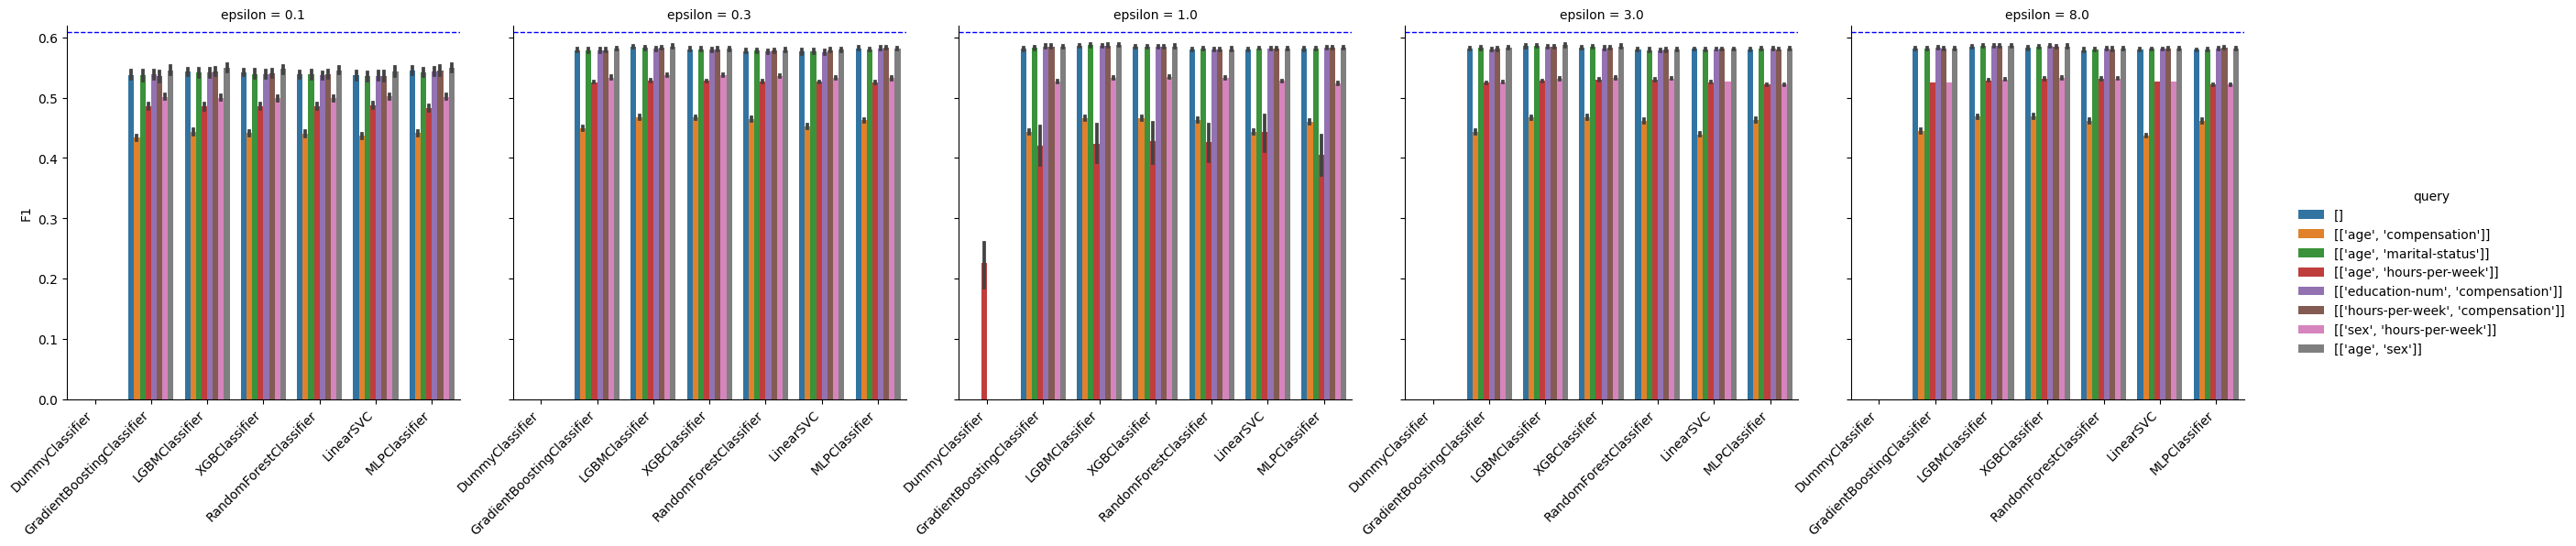

In [65]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="F1", hue="query", col="epsilon")
g.refline(y=best_F1, color = "blue", lw = 1)
g.set_xticklabels(rotation=45, ha="right")
g.set(xlabel=None)
plt.show()